In [22]:

# !pip3 install numpy
# !pip3 install tqdm
# !pip3 install matplotlib

In [1]:
%load_ext autoreload
%autoreload 2
from tests import test_method, confidence_interval, confidence_interval_steps
import matplotlib.pyplot as plt
from case_studies import *
from alg import BFGS, get_point, newton_lin_eq, steepest_lin_eq, generate_A
import numpy as np

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from time import time

plt.style.use('seaborn')
params = {'axes.labelsize': 20,'axes.titlesize':20, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}

C:\Users\14552\AppData\Local\Temp\ipykernel_19692\2050333237.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# m, n = 4,5
# A = generate_A(m,n)
# b = np.random.rand(m)


# x = np.random.rand(n)
# start_x = get_point(A,b,x)

In [24]:
# xks, dfs,iters = newton_lin_eq(start_x,f4,df4,Hf4,1.0e-10,A,0.01, 0.5) 
# print(iters)

1000


In [34]:
def plot_convergence(func_name, func, grad, hessian, max_iter=1000, dims=20, n_trials=100, con_dims = 15):
    from time import time
    eta_schedules = ["linear", "superlinear", "quadratic"]
    colors = ["red", "blue", "green"]
    optimizers = [steepest_lin_eq,newton_lin_eq]

    m, n = con_dims, dims
    A = generate_A(m,n)
    b = np.random.rand(m)
    fig, ax = plt.subplots(figsize=(15, 10))

    
    runtimes = []
    
    #x_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
    for color, optimizer in zip(colors, optimizers):
        trials = []
        x_0s = (np.random.rand(n_trials, dims) - 0.5) *200
        for i in range(len(x_0s)):
            x_0s[i] = get_point(A,b,x_0s[i])
        min_len = max_iter
        max_len = 0
        M = np.eye(A.shape[1]) - A.T@np.linalg.inv(A@A.T)@A
        for x_0 in x_0s:
            
            #xs, dfs = steepest_lin_eq(x_0,func, grad,1.0e-3,A,0.01, 0.3,max_iter=max_iter)
            
            
            

            if optimizer.__name__ == "newton_lin_eq":
                xs, dfs,criteria = newton_lin_eq(x_0,func,grad,hessian,1.0e-12,A,b,0.001, 0.5,max_iter=max_iter)
            if optimizer.__name__ == "steepest_lin_eq":
                xs, dfs, criteria = steepest_lin_eq(x_0,func, grad,1.0e-12,A,0.001, 0.5, x_opt("f3",dims), max_iter=max_iter)

            #print(criteria)

            

            grad_norms = criteria
            
            #print(xs[-1])

            if len(grad_norms) > max_len:
                max_len = len(grad_norms)
            if len(grad_norms) < max_iter:
                if len(grad_norms) < min_len:
                    min_len = len(grad_norms)
                grad_norms = np.pad(grad_norms, (0, max_iter - len(grad_norms)), constant_values=grad_norms[-1])

            trials.append(grad_norms)
            
        trials = np.array(trials)

        mean = np.mean(trials[:, :max_len], axis=0)
        std = np.std(trials[:, :max_len], axis=0)
        print(std)

        ax.plot(np.arange(max_len), mean, label=f" {optimizer.__name__} mean")
        ax.fill_between(np.arange(max_len), mean+std, mean-std, alpha=0.2, label=f" $\pm$ std")
        #ax.vlines(min_len, 0, np.max(trials), linestyle="dotted", alpha=0.1)
    #ax.set(title=f"Newton Constrainted optimization\n{func_name} (n={dims},m={con_dims})", xlabel="Step $k$", ylabel="$||p_k^T\\nabla f(x_k)||$ (log scale)")
    ax.set(title=f"Newton Constrainted optimization\n{func_name} (n={dims},m={con_dims})", yscale="log", xlabel="Step $k$", ylabel="$||p_k^T\\nabla f(x_k)||$ (log scale)")
    ax.legend( )
    
    return fig, ax

In [3]:
def plot_from_global(func_name, func, grad, hessian, max_iter=1000, dims=20, n_trials=100, con_dims = 15):
    from time import time
    eta_schedules = ["linear", "superlinear", "quadratic"]
    colors = ["red", "blue", "green"]
    optimizers = [steepest_lin_eq,newton_lin_eq]

    m, n = con_dims, dims
    A = generate_A(m,n)
    b = np.random.rand(m)
    fig, ax = plt.subplots(figsize=(15, 10))
    xopt = x_opt(func_name,dims)

    
    runtimes = []
    
    #x_0s = (np.random.rand(n_trials, dims) - 0.5) * 200
    for color, optimizer in zip(colors, optimizers):
        trials = []
        x_0s = (np.random.rand(n_trials, dims) - 0.5) *200
        for i in range(len(x_0s)):
            x_0s[i] = get_point(A,b,x_0s[i])
        min_len = max_iter
        max_len = 0
        M = np.eye(A.shape[1]) - A.T@np.linalg.inv(A@A.T)@A
        for x_0 in x_0s:
            
            #xs, dfs = steepest_lin_eq(x_0,func, grad,1.0e-3,A,0.01, 0.3,max_iter=max_iter)
            
            
            

            if optimizer.__name__ == "newton_lin_eq":
                xs, dfs = newton_lin_eq(x_0,func,grad,hessian,1.0e-5,A,b,0.001, 0.5,max_iter=max_iter)
                
            if optimizer.__name__ == "steepest_lin_eq":
                xs, dfs = steepest_lin_eq(x_0,func, grad,1.0e-5,A,0.001, 0.5,max_iter=max_iter)

            #grad_norms = np.array([np.linalg.norm((M@grad(x)).T@grad(x)) for x in xs])
            #grad_norms = np.array([np.linalg.norm(grad(x)) for x in xs])
            distance = np.array([np.linalg.norm(x-xopt) for x in xs])


            #print(xs[-1])

            if len(distance) > max_len:
                max_len = len(distance)
            if len(distance) < max_iter:
                if len(distance) < min_len:
                    min_len = len(distance)
                distance = np.pad(distance, (0, max_iter - len(distance)), constant_values=distance[-1])

            trials.append(distance)
            
        trials = np.array(trials)

        mean = np.mean(trials[:, :max_len], axis=0)
        std = np.std(trials[:, :max_len], axis=0)

        ax.plot(np.arange(max_len), mean,  c=color,label=f" {optimizer.__name__} mean")
        ax.fill_between(np.arange(max_len), mean+std, mean-std, alpha=0.2,color=color, label=f" $\pm$ std")
        #ax.vlines(min_len, 0, np.max(trials), linestyle="dotted", alpha=0.1)

    ax.set(title=f"Comparison between Newton Algorithm and Steepest Descent on distance from global optimum \n{func_name} (n={dims},m={con_dims})", yscale="symlog", xlabel="Step $k$", ylabel="$||x*-x_{opt}||$ (log scale)")
    ax.legend( )
    
    return fig, ax

## Testing all functions

In [55]:
funcs = [
    ("Ellipsoid", f1, df1, Hf1),
    ("Rosenbrock", f2, df2, Hf2),
    ("Log-ellipsoid", f3, df3, Hf3),
    ("Attractive sector", f4, df4, Hf4),  
    ("Sum of different powers", f5, df5, Hf5)
]
func_name, func, grad, hess = funcs[4]

[1.50960877e+11 1.75679650e+10 4.30694347e+08 1.25806562e+08
 2.82629526e+07 5.01480769e+06 7.80842651e+05 7.94446544e+04
 2.96044470e+04 6.46507047e+03 9.11077034e+02 1.04978698e+02
 7.82260718e+00 2.75224888e-01 3.09117502e-04 4.61690544e-04
 2.90871667e-04 1.97154943e-04 1.39441370e-04 9.88944206e-05
 7.01847513e-05 4.95163060e-05 3.48499325e-05 2.38650943e-05
 1.58926008e-05 1.04477236e-05 6.04139411e-06 5.05666295e-06
 3.61177672e-06 2.57086075e-06 1.83381894e-06 1.30381205e-06
 9.29539995e-07 6.62023569e-07 4.22280762e-07 6.32039602e-07
 4.57314316e-07 3.31873204e-07 2.54789936e-07 4.05045666e-07
 5.31366374e-07 3.66118578e-07 2.51844976e-07 1.72768108e-07
 1.18207139e-07 7.28679986e-08 9.93829768e-08 6.91823598e-08
 4.80653119e-08 3.33019130e-08 2.30274506e-08 1.58849345e-08
 1.09462364e-08 7.49849206e-09 1.04082286e-08 8.96618151e-09
 1.93073673e-08 1.38690843e-08 9.48253432e-09 6.56516181e-09
 4.53330563e-09 3.12028994e-09 2.13985884e-09 1.33527043e-09
 1.95768706e-09 1.358139

[]

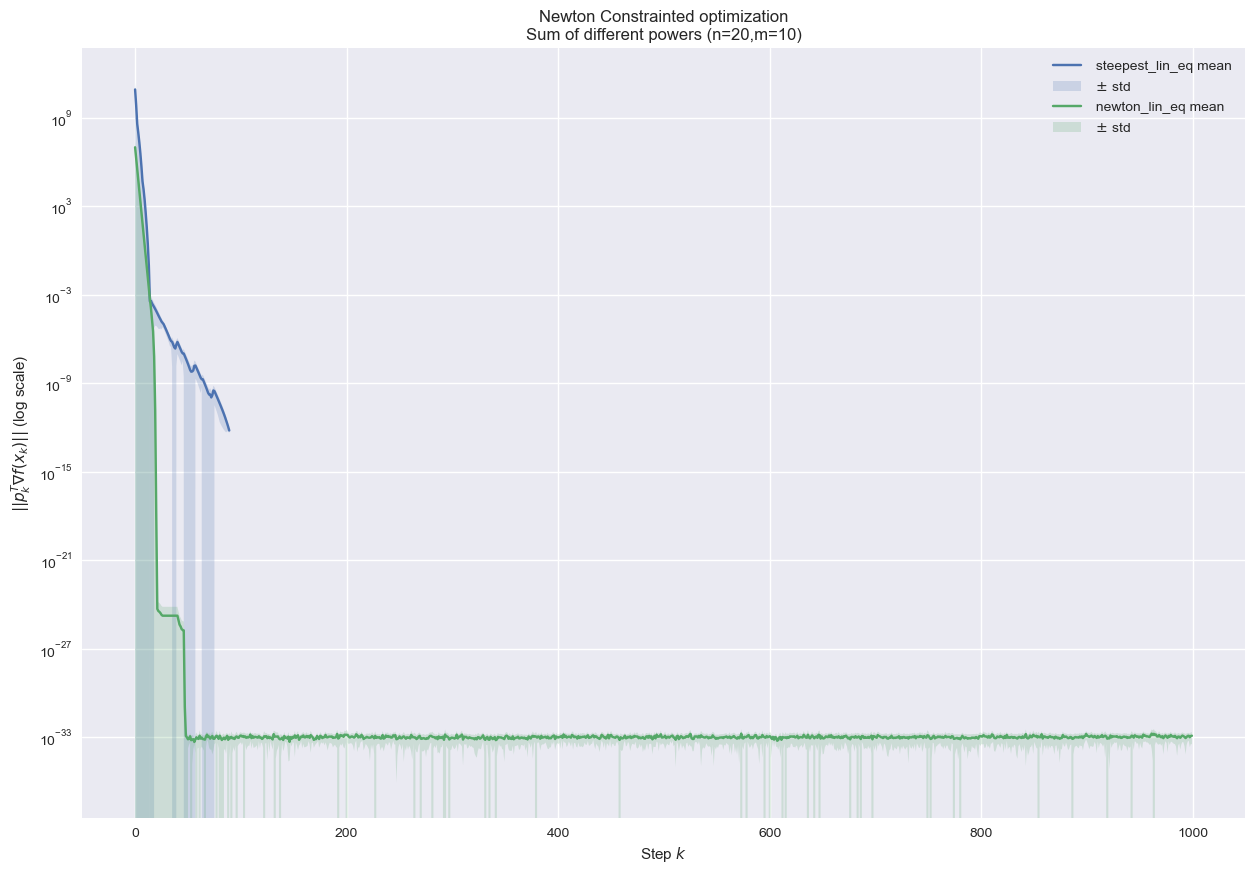

In [56]:
fig, ax = plot_convergence(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=10,max_iter=1000)
ax.plot()

TypeError: steepest_lin_eq() missing 1 required positional argument: 'x_opt'

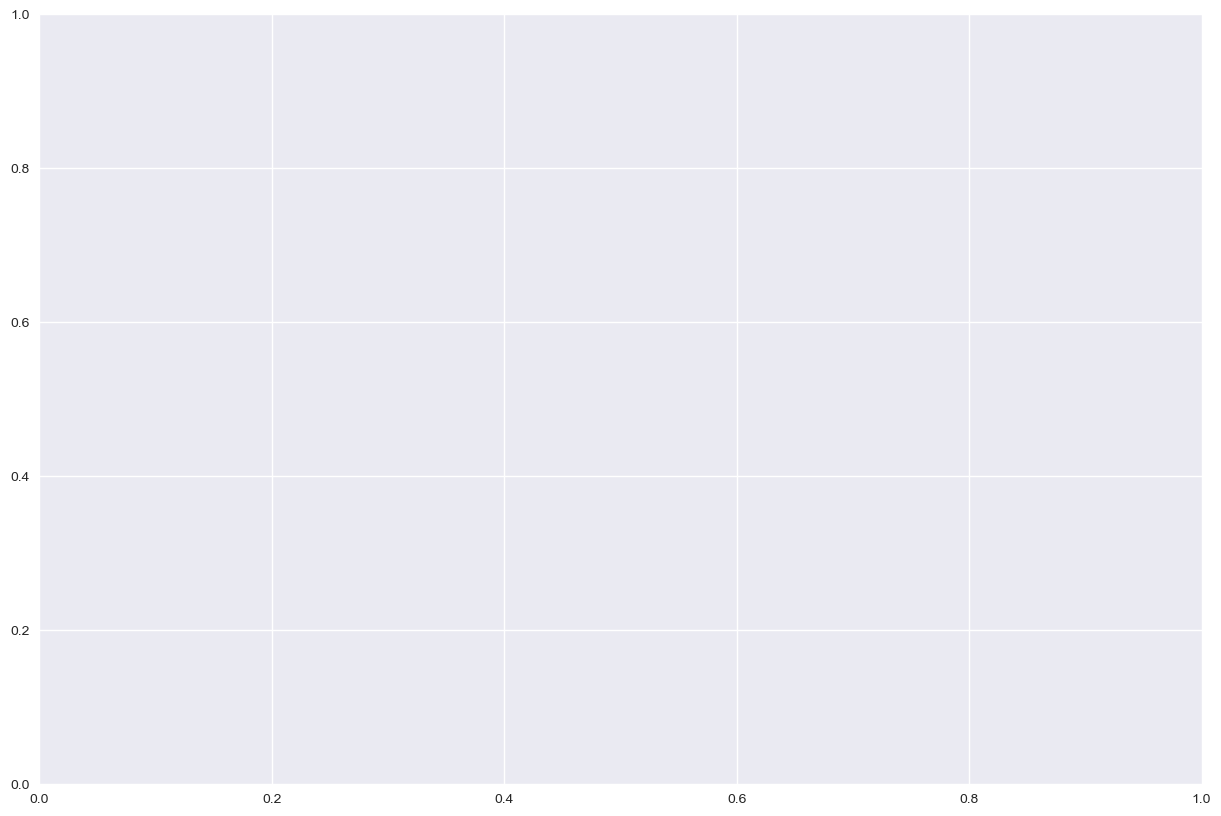

In [30]:
fig, ax = plot_from_global(func_name,func,grad,hess,con_dims=10,dims=20,n_trials=100)
fig.savefig(f"{func_name}_distance_from_global_opt_comparison.png")

In [18]:
%autoreload 2
xks1, xks2, xks3,xks4,xks5, i1, i2, i3, i4, i5 = test_method(100, 100, eps=1.0e-8)

  0%|          | 0/100 [00:00<?, ?it/s]


IndexError: tuple index out of range

## Testing one run for debugging

In [ ]:
x = BFGS(np.array([0.8734294 , 0.96854066, 0.86919454, 0.53085569]), f1, df1, 1.0e-8, 0.0001, 0.9)

In [48]:
def make_plot(dfs, title, png):
    plt.plot(confidence_interval(dfs.copy(), 5))
    plt.plot(confidence_interval(dfs.copy(), 50))
    plt.plot(confidence_interval(dfs.copy(), 95))
    plt.title(title)
    plt.yscale('log')    
    plt.xlabel("Iterations")
    plt.ylabel("Mean norm of gradient")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

In [49]:
def make_subplot(dfs, title, axs):
    axs.plot(confidence_interval(dfs.copy(), 5))
    axs.plot(confidence_interval(dfs.copy(), 50))
    axs.plot(confidence_interval(dfs.copy(), 95))
    axs.set_title(title)
    axs.set_yscale('log')    
    axs.set_xlabel("Iterations")
    axs.set_ylabel("Mean norm of gradient")
    axs.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    

In [73]:
def make_plot_steps(dfs, title, png):
    plt.plot(confidence_interval_steps(dfs.copy(), 5))
    plt.plot(confidence_interval_steps(dfs.copy(), 50))
    plt.plot(confidence_interval_steps(dfs.copy(), 95))
    plt.title(title)
    #plt.yscale('log')    
    plt.xlabel("Calls to CG")
    plt.ylabel("Average iterations in CG")
    plt.legend(["5-percentile confidence", "Median", "95-percentile confidence"])
    
    plt.savefig(png)
    plt.show()

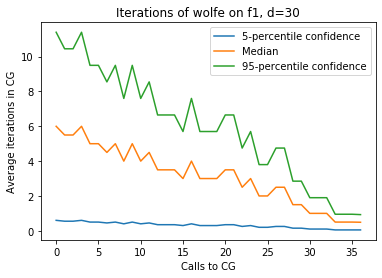

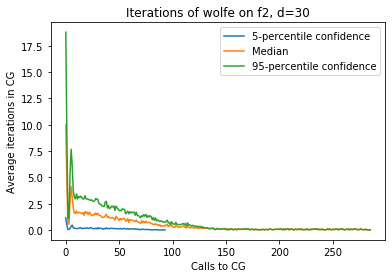

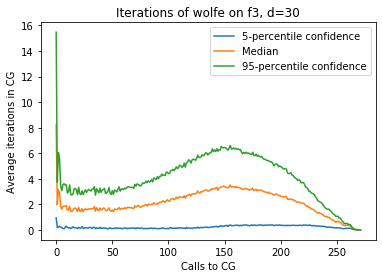

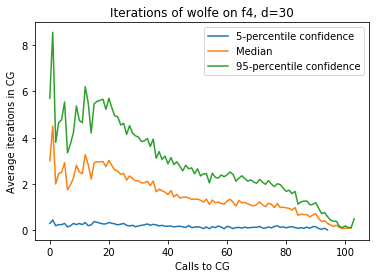

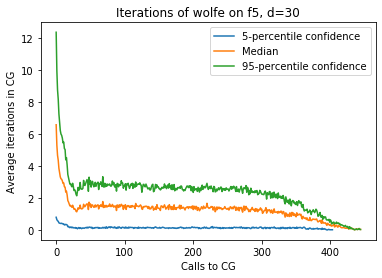

In [82]:
make_plot_steps(i1, "Iterations of wolfe on f1, d=30", "iter_f1_wolfe")
make_plot_steps(i2, "Iterations of wolfe on f2, d=30", "iter_f2_wolfe")
make_plot_steps(i3, "Iterations of wolfe on f3, d=30", "iter_f3_wolfe")
make_plot_steps(i4, "Iterations of wolfe on f4, d=30", "iter_f4_wolfe")
make_plot_steps(i5, "Iterations of wolfe on f5, d=30", "iter_f5_wolfe")

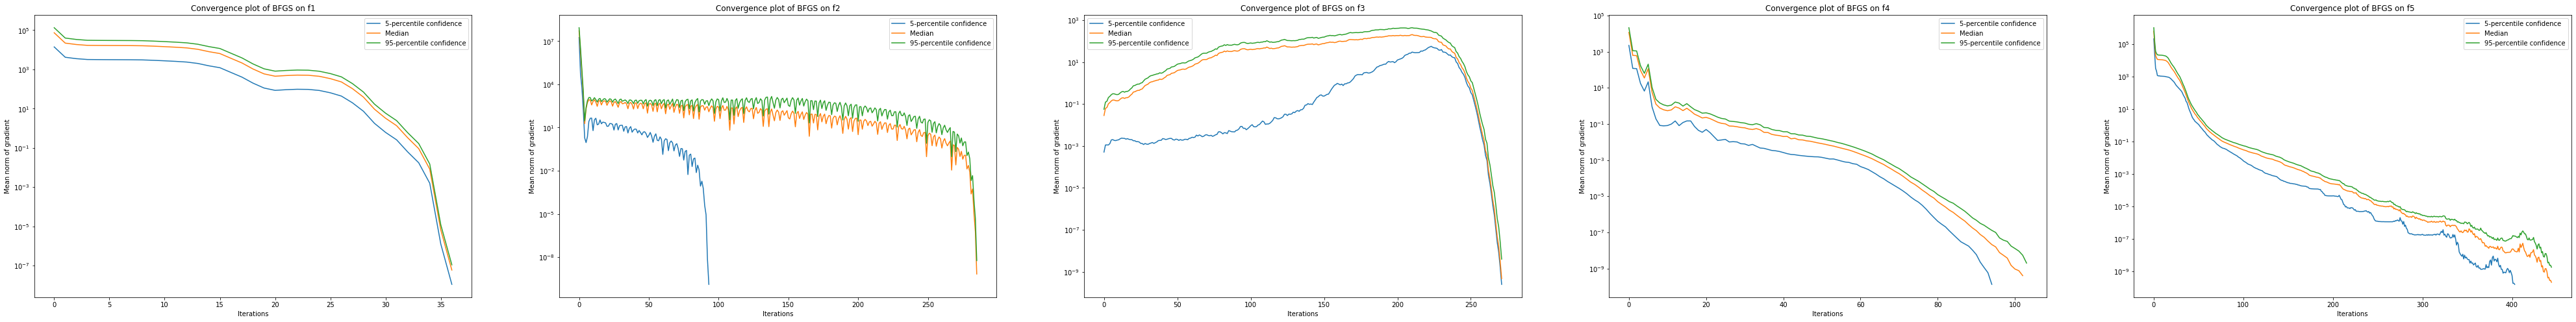

In [83]:
fig, axs = plt.subplots(1, 5, figsize=(70,8))
make_subplot(xks1, "Convergence plot of BFGS on f1", axs[0])
make_subplot(xks2, "Convergence plot of BFGS on f2", axs[1])
make_subplot(xks3, "Convergence plot of BFGS on f3", axs[2])
make_subplot(xks4, "Convergence plot of BFGS on f4", axs[3])
make_subplot(xks5, "Convergence plot of BFGS on f5", axs[4])

plt.savefig("Convergence_plots_100d")
plt.show()

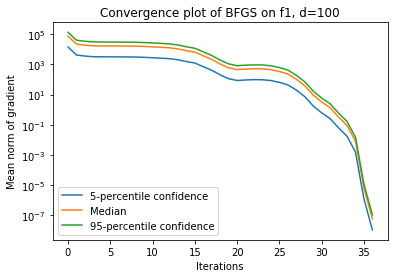

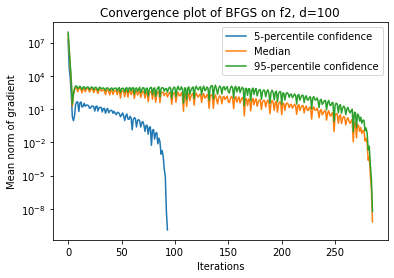

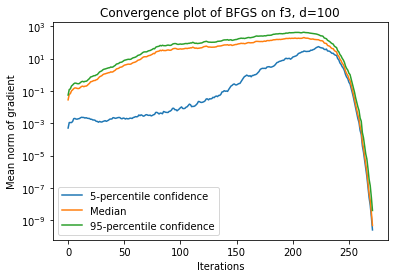

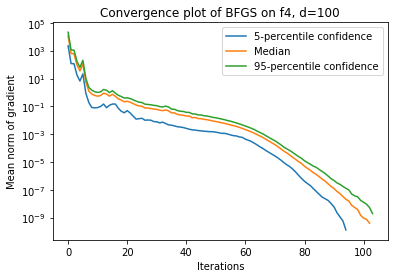

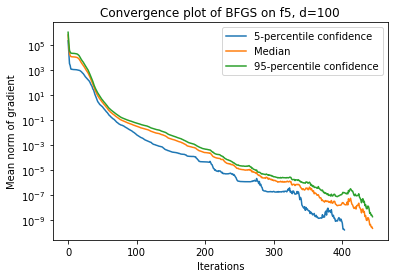

In [85]:
make_plot(xks1, "Convergence plot of BFGS on f1, d=100", "f1_conv_BFGS_c2_025")
make_plot(xks2, "Convergence plot of BFGS on f2, d=100", "f2_conv_BFGS_c2_025")
make_plot(xks3, "Convergence plot of BFGS on f3, d=100", "f3_conv_BFGS_c2_025")
make_plot(xks4, "Convergence plot of BFGS on f4, d=100", "f4_conv_BFGS_c2_025")
make_plot(xks5, "Convergence plot of BFGS on f5, d=100", "f5_conv_BFGS_c2_025")

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(50,10))
axs[0].plot(confidence_interval(xks1.copy(), 5))
axs[0].plot(confidence_interval(xks1.copy(), 50))
axs[0].plot(confidence_interval(xks1.copy(), 95))
axs[0].set_title("Convergence plot of")
axs[0].set_yscale('log')    
axs[0].set_xlabel("Iterations")
axs[0].set_ylabel("Mean norm of gradient")
axs[0].legend(["5-percentile confidence", "Median", "95-percentile confidence"])

## Test line search


In [ ]:
from alg import wolfe_search